<a href="https://colab.research.google.com/github/2118-7/Project-ML/blob/master/mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.**

## **Steps and tasks:**
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc 
2. Check if you need to clean the data for any of the variables 
3. EDA: Study the data distribution in each attribute and target variable, share your findings.

  ● Number of unique in each column? 

  ● Number of people with zero mortgage? 

  ● Number of people with zero credit card spending per month?
  
  ● Value counts of all categorical columns. 

  ● Univariate and Bivariate analysis 4. Apply necessary transformations for the feature variables 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively.

6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans. 
7. Print all the metrics related for evaluating the model performance 
8. Build various other classification algorithms and compare their performance 
9. Give a business understanding of your model

# **Step1:**

## **1.1** : In order to train up a model we need to collect the data so in tha above step we have collected the data
## When we are working with google collab we need to upload the files with which we should work

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (4).csv


##**1.2**  Then we have read the csv file and we'll the check with redundancy of the data

In [3]:
import io
data=pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## **1.3**   we need to check the datatypes with which we gonna work

In [5]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
print("number of customers inn the list: "+str(len(data.index)))


number of customers inn the list: 5000


## **1.4**  we now need to check the statistical summary

In [7]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **1.5**  Now we need to check with he dimensions of the data that is nothing but number of rows and columns in the data

In [8]:
data.shape

(5000, 14)

**so there are 5000 rows and 14 columns in the data bold text**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# **Step 2:** **CHECK WITH REDUNDANCY VALUES**

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
data['Experience']=data['Experience'].replace(-3.000000,data['Experience'].median())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
data[data<0]=0

In [14]:
data['Experience'][4514]

0

In [15]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [16]:
data['Experience']=data['Experience'].replace(0,data['Experience'].median())

In [17]:
data['Experience'].median()

20.0

## **After replacing negative values in the data by median**

In [18]:
data.describe() #it only shows intergers as output but not strings.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.591600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.004864,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,1.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 2.1 **Dropping irrelevant columns**
## In machine learning model it is necessary to replace negative values with either mean or median and I choose to drop the experience column as there are highly corelated  with each other

In [19]:
exp=data['Experience']
age=data['Age']
corelation=exp.corr(age)
corelation


0.9579787429805194

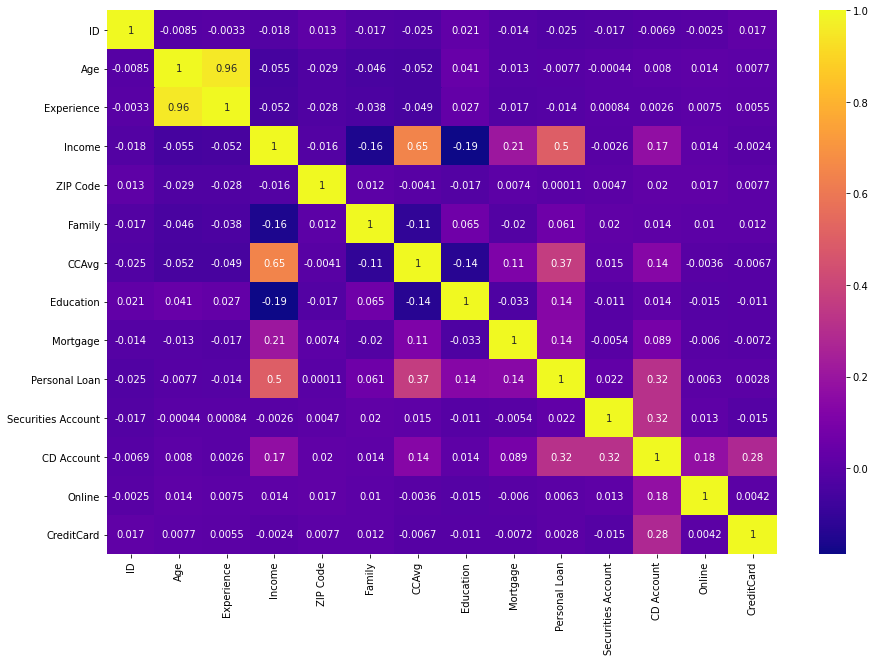

In [20]:
## After dropping experience column earlier,it doesn't seems to be significant correlation
## b/w variables except income and CCAvg
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma',annot=True)

**observation:**AS  we can see that Age and Experience are highly corelated.SO we need to remove Experience column

In [21]:
data=data.drop(['ID','Experience'],axis=1)
data.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


##**STEP 3:**
## **EDA stands for Exploratory data analysis**.
###Steps involved in these are to understand the data,clean the data and analysis on relationship between variables.

In [22]:
data.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [23]:
data.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


## **3.1     To find number of unique values in each column**

In [24]:
data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [25]:
data['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [26]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [27]:
#checking for null values
data.isnull().sum()

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### As there are no null values we can procced  coming to next step 

1.  coming to next step we should look for outliers which causes major differences in the results.
2.  we should look for outliers which causes major differences in the results. 
1. Then we need to drop the unwanted columns that is Id which consists of random values and no use with predicting the target variable, so I have dropped them in previous step.
2.   Now we need to understand the relationship between variables. 



In [28]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


### **3.2: As a process of rcleaning the data we need to check for outliers which affects the performance and result of the model.**
###**So I used histogram graph to find out outliers and to check for skewed data and normal distribution too**

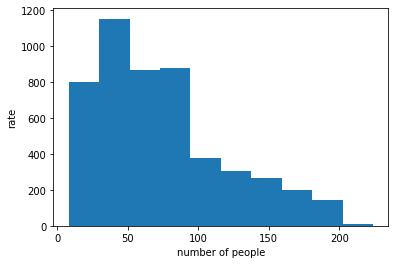

In [29]:
p=plt.hist(data['Income'])
h=plt.xlabel('number of people')
v=plt.ylabel('rate')
plt.show()

**observation**:From the above graph people above 200 are getting low income which is below two hundered so these are considered as outliers

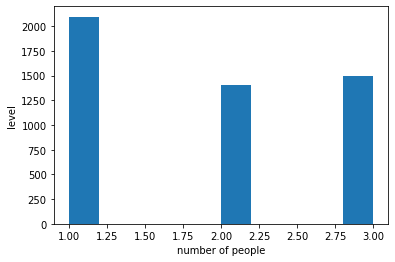

In [30]:
p=plt.hist(data['Education'])
h=plt.xlabel('number of people')
v=plt.ylabel('level')
plt.show()

**observation**:There are no outliers from the grpah inference

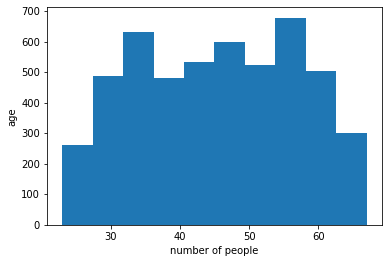

In [31]:
p=plt.hist(data['Age'])
h=plt.xlabel('number of people')
v=plt.ylabel('age')
plt.show()

**observation**:There are no outliers from the grpah inference

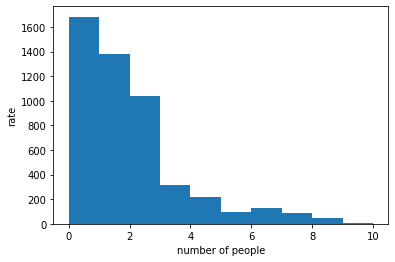

In [32]:
p=plt.hist(data['CCAvg'])
h=plt.xlabel('number of people')
v=plt.ylabel('rate')
plt.show()

**observation**:From the above graph there are outliers from above seventh part people are having vey low CCAvg which is below 100.

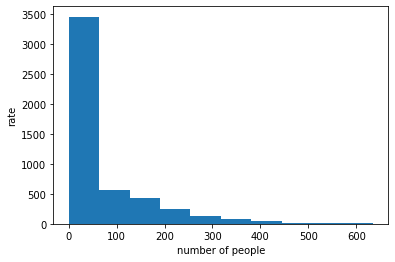

In [33]:
p=plt.hist(data['Mortgage'])
h=plt.xlabel('number of people')
v=plt.ylabel('rate')
plt.show()

**observation**:From the above graph we can see that there are outliers above 300.

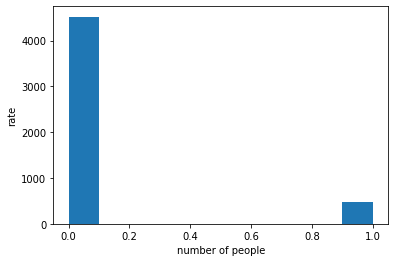

In [34]:
p=plt.hist(data['Personal Loan'])
h=plt.xlabel('number of people')
v=plt.ylabel('rate')
plt.show()

**observation**:There are no outliers from the grpah inference

In [35]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


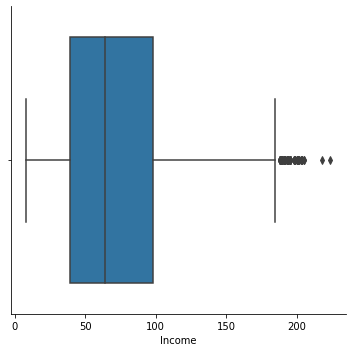

In [36]:
sns.catplot(x='Income',kind='box',data=data)

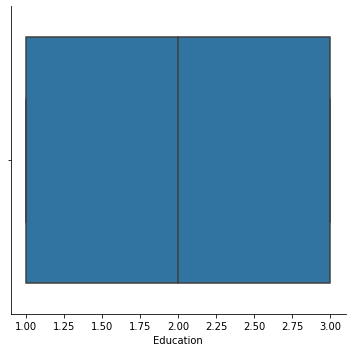

In [37]:
sns.catplot(x='Education',kind='box',data=data)

In [38]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


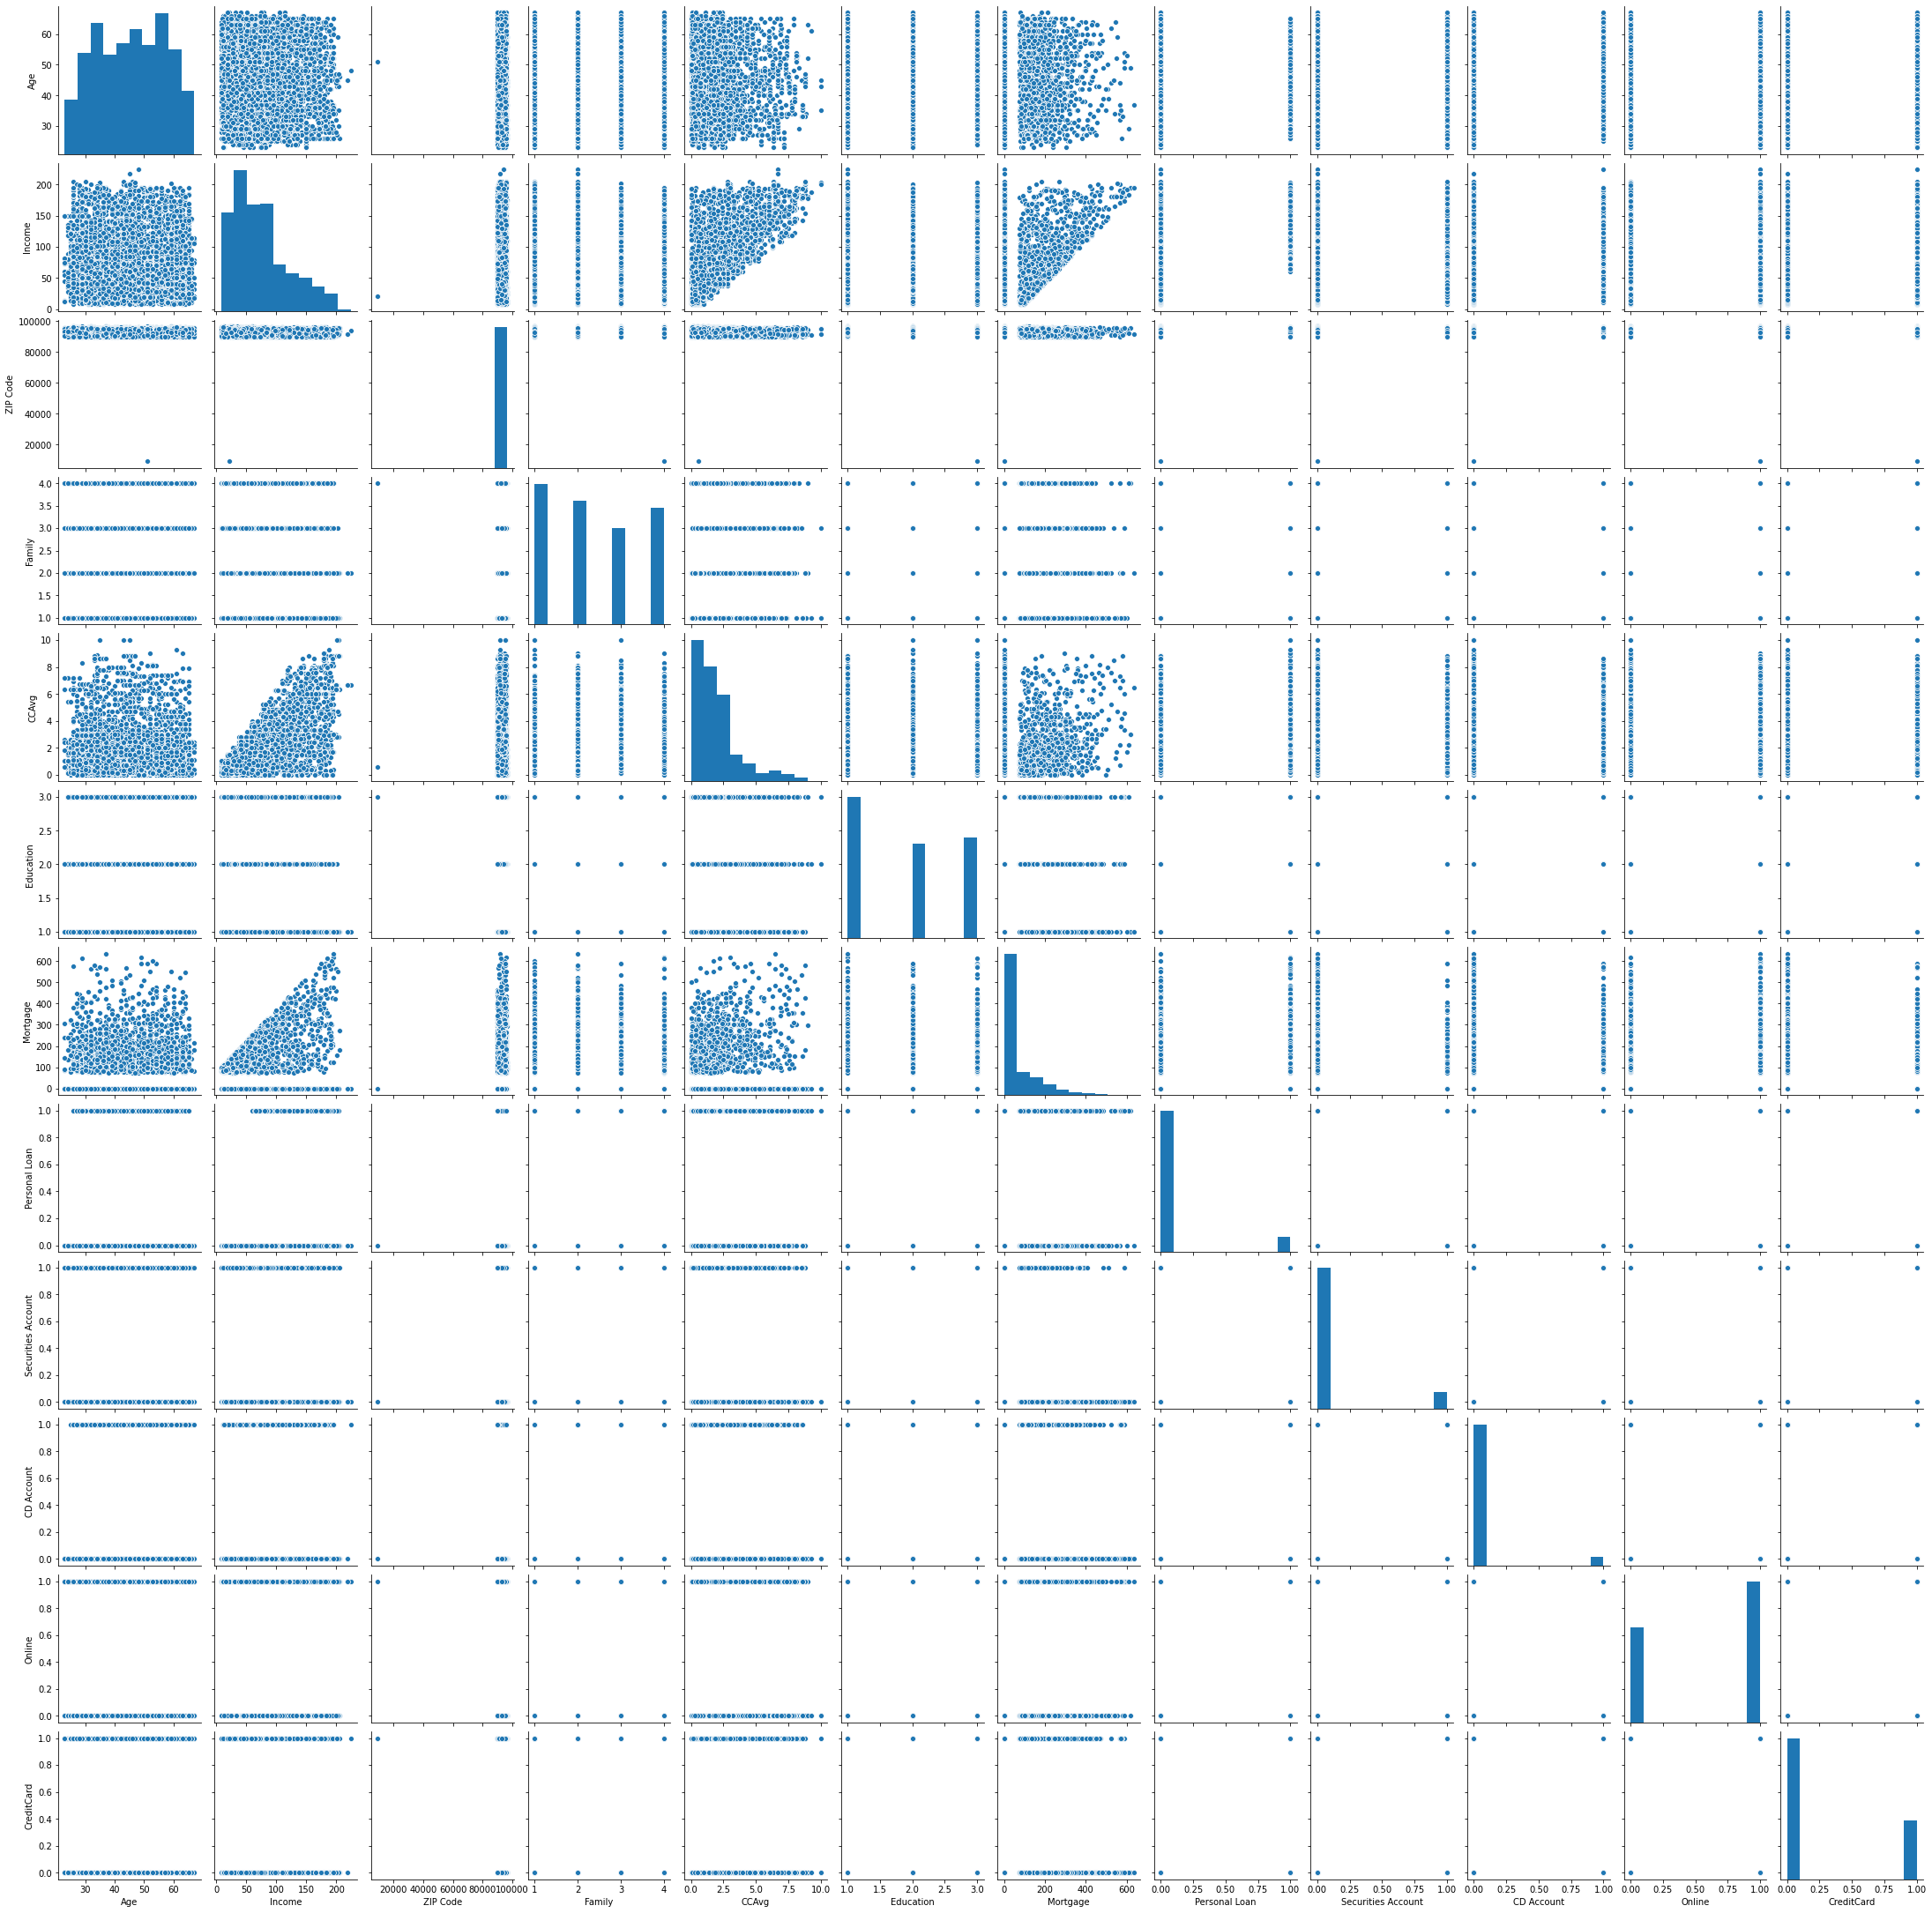

In [39]:
sns.pairplot(data)

In [40]:


data

 

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


### ** The reason why we opted for bivariate analysis is that in univariate analysis it might not be able to show all the features of the target variable and it may overlaps some fatures too**

### **Bivaraiate Analysis**

In this we'll be taking atleast two features to see how output will be like.

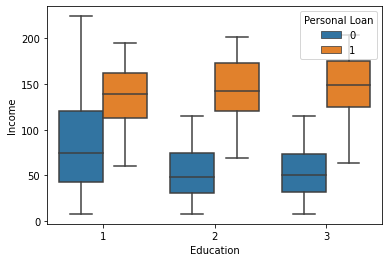

In [41]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

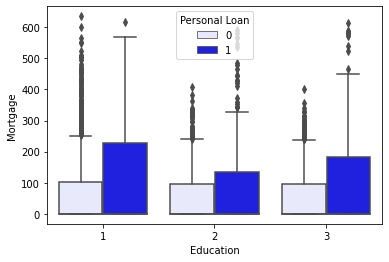

In [42]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='blue') 

 **Observaion:** From the above chart, we can say that customer who do not have personal loan and customer who has personal loan have high mortgage

**FaceGrid is to check for overlapping and overfitting btwenn two features**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


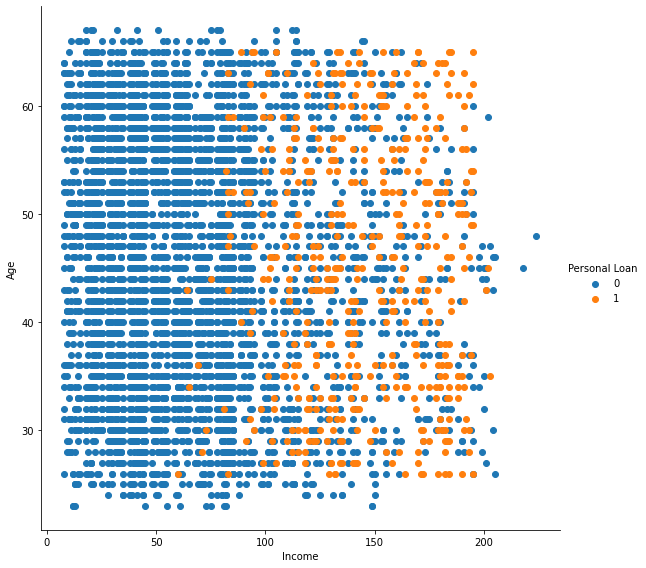

In [43]:
sns.FacetGrid(data,hue='Personal Loan',size=8).map(plt.scatter,"Income","Age").add_legend()

**observation:**there is overlapping of data.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


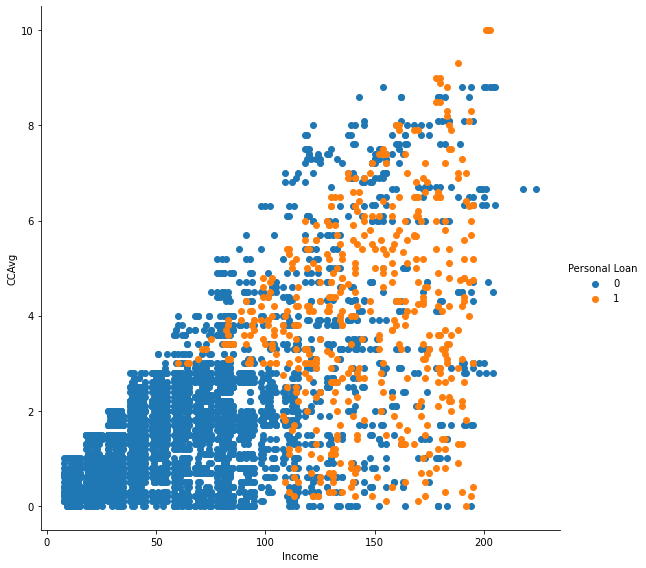

In [44]:
sns.FacetGrid(data,hue='Personal Loan',size=8).map(plt.scatter,"Income","CCAvg").add_legend()

**observation:**there is overlapping of data

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


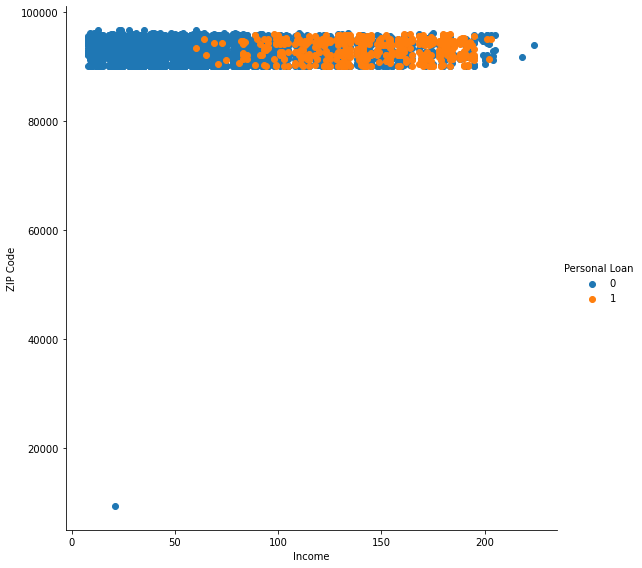

In [45]:
sns.FacetGrid(data,hue='Personal Loan',size=8).map(plt.scatter,"Income","ZIP Code").add_legend()

**observation:**There is less overlapping of data.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


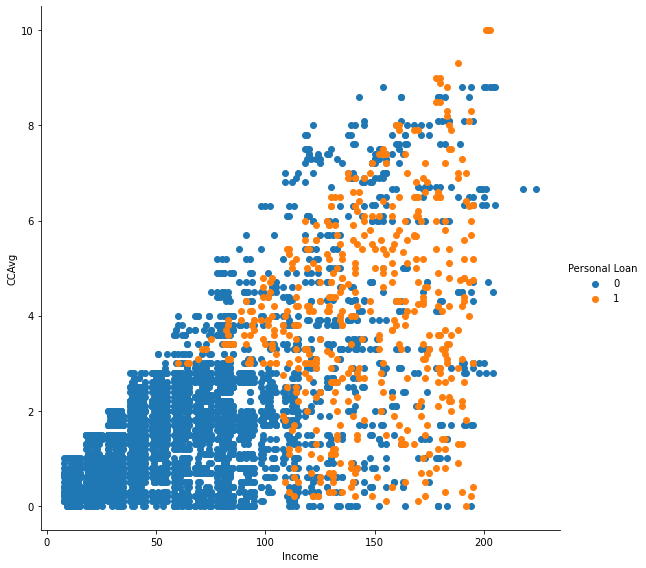

In [46]:
sns.FacetGrid(data,hue='Personal Loan',size=8).map(plt.scatter,"Income","CCAvg").add_legend()

**observation:**There is more overlapping of data.



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


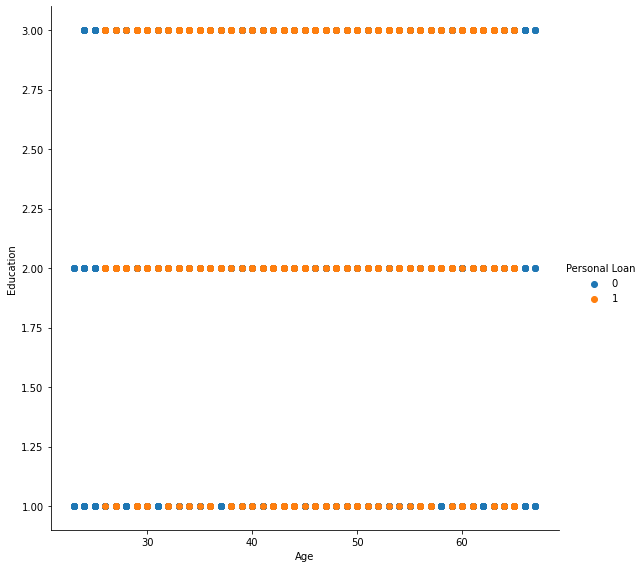

In [47]:
sns.FacetGrid(data,hue='Personal Loan',size=8).map(plt.scatter,"Age","Education").add_legend()

**observation:**there is very less overlapping of data.

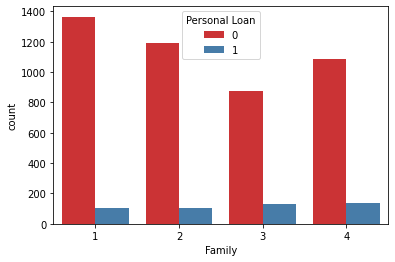

In [48]:
sns.countplot(x='Family',hue='Personal Loan',data=data,palette='Set1')

Inference : From the above graph, we can say that Family size does not have any impact on personal loan. But it seems families with size of 3  and 4 are more likely to take loan. While considering future campaign this might be a good association

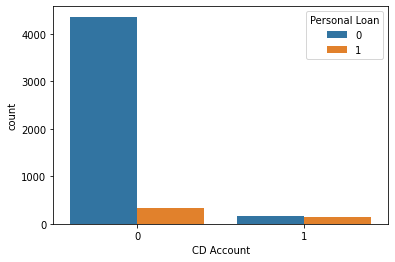

In [49]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan') 

**Observation :** From the above graph,we can say that Customers without CD Account  , does not have to take loan  and the person who are havig Cd ACcount all are taking loans.

## **3.3**
I have found that there are outliers in Income,CCAvg.
I also found that Income and CCAVg graphs are right skewed.
In order to find outliers I have used **IQr** method. 

## **3.4**
**Steps**

  1.Arrange tha data in increasig order.

  2.Calculate q1 and q3.

  3.Find interquartile range (q3-q1)

  4.Find lower bound-q1*1.5

  5.Find upper bound = q3*1.5 

**Anything that lies outside lower and upper bound we consider them as outliers**


In [50]:
'''q1=data.quantile(0.25)
q3=data.quantile(0.75)
print(q1,q3)'''

'q1=data.quantile(0.25)\nq3=data.quantile(0.75)\nprint(q1,q3)'

In [51]:
'''iq=q3-q1
iq'''

'iq=q3-q1\niq'

In [52]:
'''lb=q1-(1.5)*iq
ub=q3+(1.5)*iq
print(lb,ub)'''

'lb=q1-(1.5)*iq\nub=q3+(1.5)*iq\nprint(lb,ub)'

In [53]:
'''data=data[~((data<lb) | (data>ub)).any(axis=1)]
data.shape'''

'data=data[~((data<lb) | (data>ub)).any(axis=1)]\ndata.shape'

In [54]:
data

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


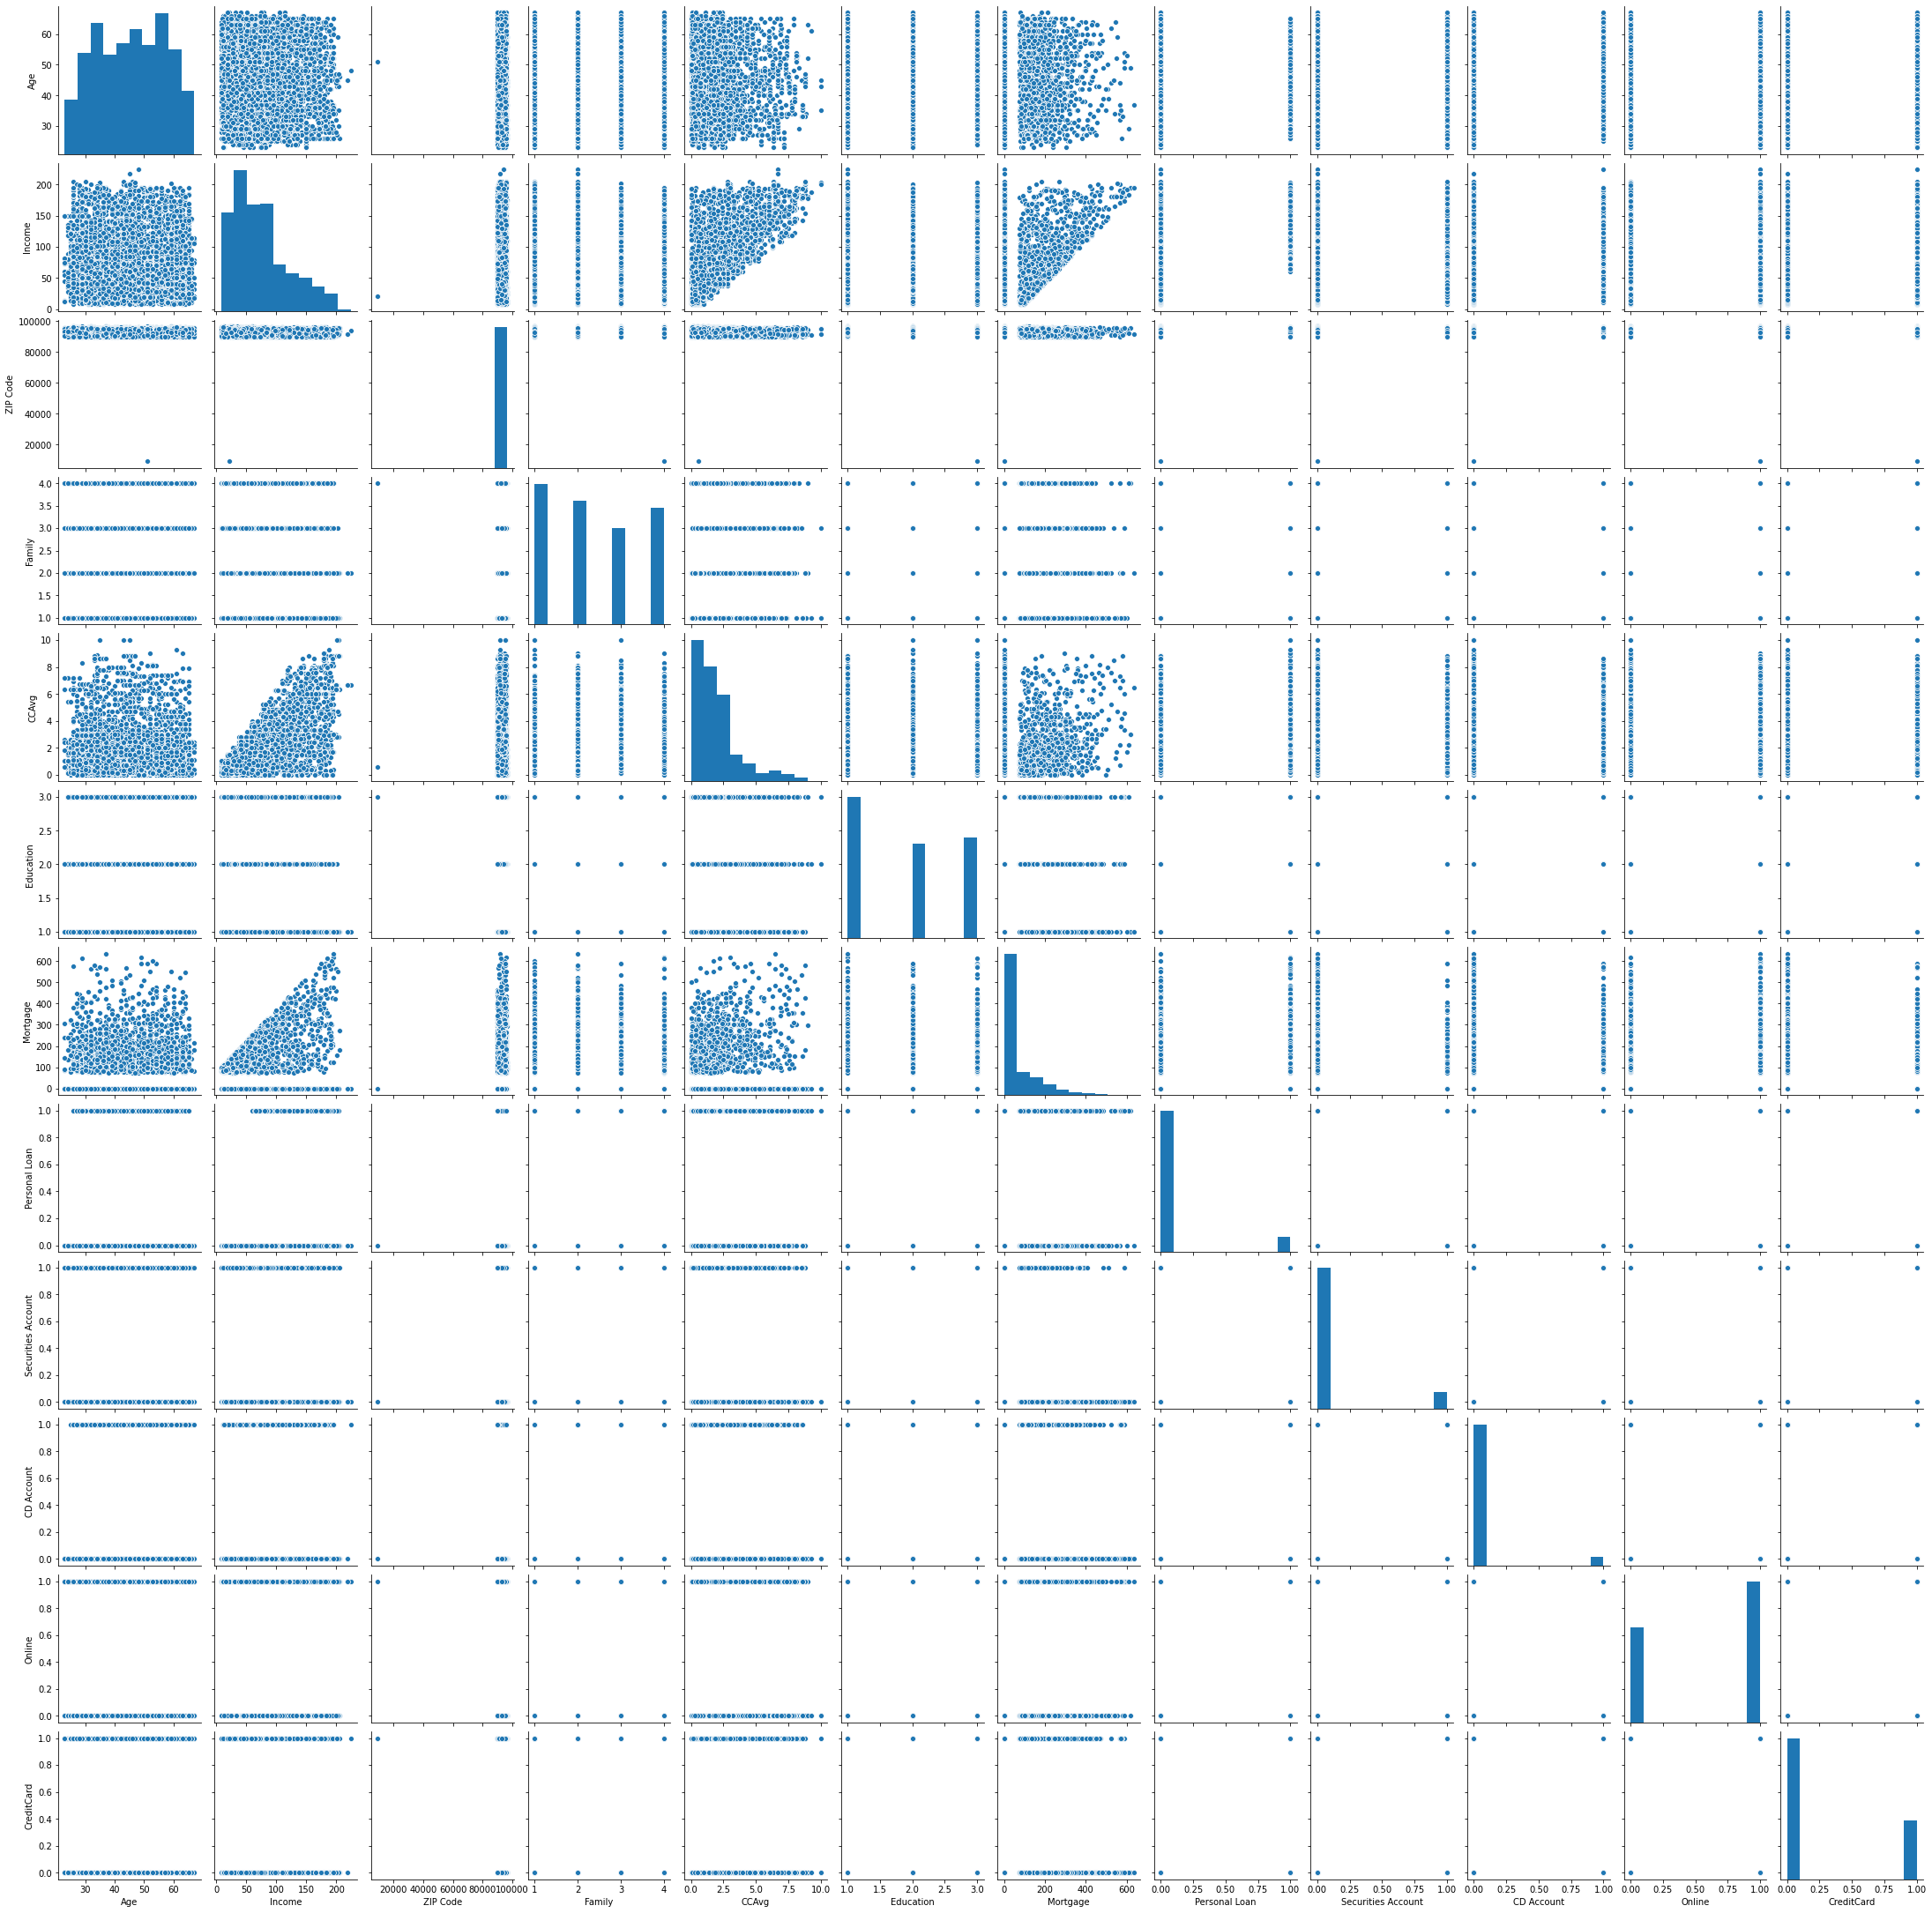

In [55]:
sns.pairplot(data)

## **3.6 scince zip code is categorical data and needs to be converted into numerical data since zip codde is nominal data we need to remove this**

In [56]:
data.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [57]:
##Number of people with zero mortagage needs to be returned
#so there are 3462 people 
(data.Mortgage==0).sum()

3462

In [58]:
##number of people with 0 credit card spending per month
#there are 106 peple 
(data.CCAvg==0).sum()

106

**Value counts of each colum**

In [59]:
data.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [60]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [61]:
data.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [62]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [63]:
data['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [64]:
data['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [65]:
data['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [66]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [67]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [68]:
data.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


# **Univariate Analysis**
### It hepl us to easily understand the data,analyse the data and leads us to go in a right path,we'll take only one of the features which leads the person to take personal loan.

In [69]:
data.loc[data['Personal Loan']==0]

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


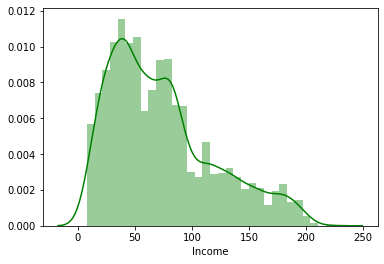

In [70]:
sns.distplot(data['Income'],color="green")

**observation**:The above grpah is right skewed that means data is not distributed normally.

*   SO for categorical dataset data should be normally distributed
*   Hence we have to apply normalisation and standardisation techniqes

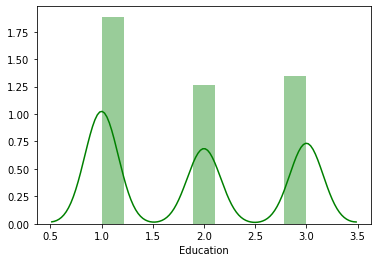

In [71]:

sns.distplot(data['Education'],color="green")

**observation**:From athe above inference bell curves are throughout so data is distributed normally.

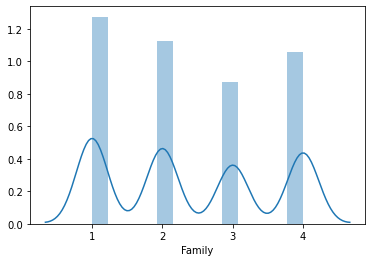

In [72]:
sns.distplot(data['Family'])

**observation**:From athe above inference bell curves are throughout so data is distributed normally.

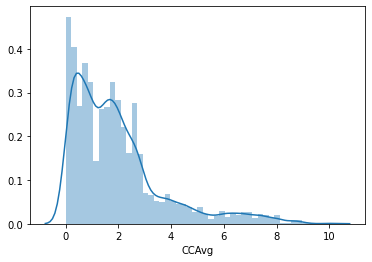

In [73]:
sns.distplot(data['CCAvg'])

**observation**:The above grpah is right skewed that means data is not distributed normally.

*   SO for categorical dataset data should be normally distributed
*   Hence we have to apply normalisation and standardisation techniqes

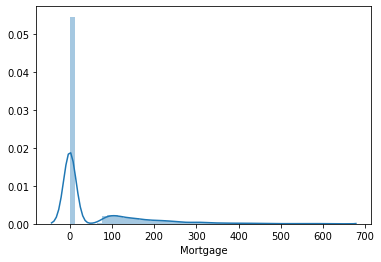

In [74]:
sns.distplot(data['Mortgage'])

**observation**:The above grpah is right skewed that means data is not distributed normally.

*   SO for categorical dataset data should be normally distributed
*   Hence we have to apply normalisation and standardisation techniqes



**A box-plot is a very useful and standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile, second quartile(median), third quartile, maximum).**

**It helps in understanding these parameters of the distribution of data and is extremely helpful in detecting outliers.**

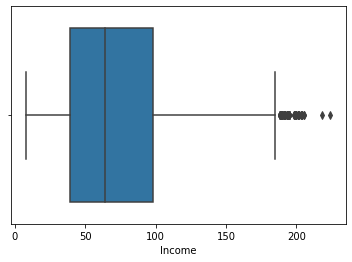

In [75]:
sns.boxplot(data['Income'])

**Observation:**From the above group there are  outliers in Income data

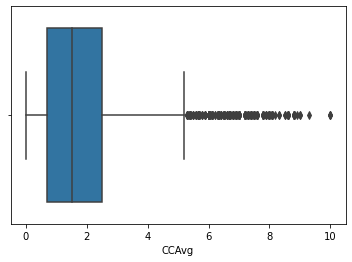

In [76]:
sns.boxplot(data['CCAvg'])

**Observation:**There are  outliers in CCAvg column too.

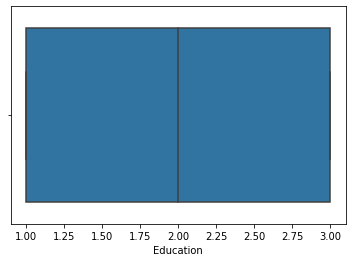

In [77]:
sns.boxplot(data['Education'])

**Obervation:**There are no outliers in EDucation too

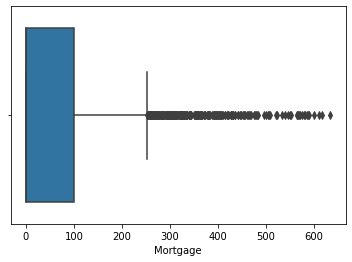

In [78]:
sns.boxplot(data['Mortgage'])

**observation:**There are outliers in Mortagage

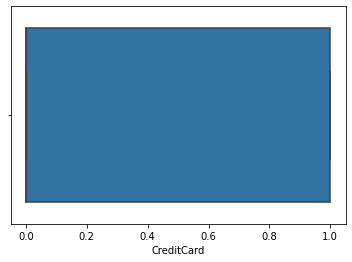

In [79]:
sns.boxplot(data['CreditCard'])

**observation:**There are no outliers in creditcard data too.

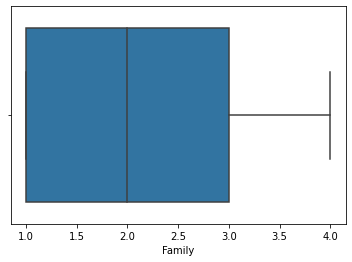

In [80]:
sns.boxplot(data['Family'])

**observation:**There are no outliers in Education data too.

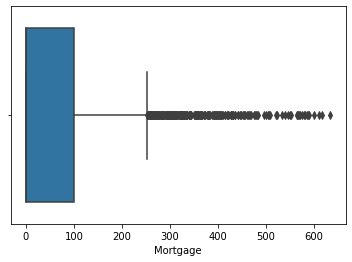

In [81]:
sns.boxplot(data['Mortgage'])

**observation:**From the above graph we can see that there are outliers.

In [82]:
df_pl=data.loc[data['Personal Loan']==1]
df_pl

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,180,93023,1,8.9,3,0,1,0,0,0,0
16,38,130,95010,4,4.7,3,134,1,0,0,0,0
18,46,193,91604,2,8.1,3,0,1,0,0,0,0
29,38,119,94104,1,3.3,2,0,1,0,1,1,1
38,42,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,129,92646,3,4.1,3,0,1,0,1,1,1
4927,43,121,94720,1,0.7,2,0,1,0,1,1,1
4941,28,112,90049,2,1.6,2,0,1,0,0,1,0
4962,46,122,90065,3,3.0,3,0,1,0,1,1,1


In [83]:
df_pl.shape

(480, 12)

In [84]:
df_npl=data.loc[data['Personal Loan']==0]
df_npl

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


In [85]:
df_npl.shape

(4520, 12)

**We'll go for multivariate analysis if we have more features to concentrate on for our target varaiable.I also helps us to find out correlation between variables whether positive or negative**

## **Multivariate Analysis**

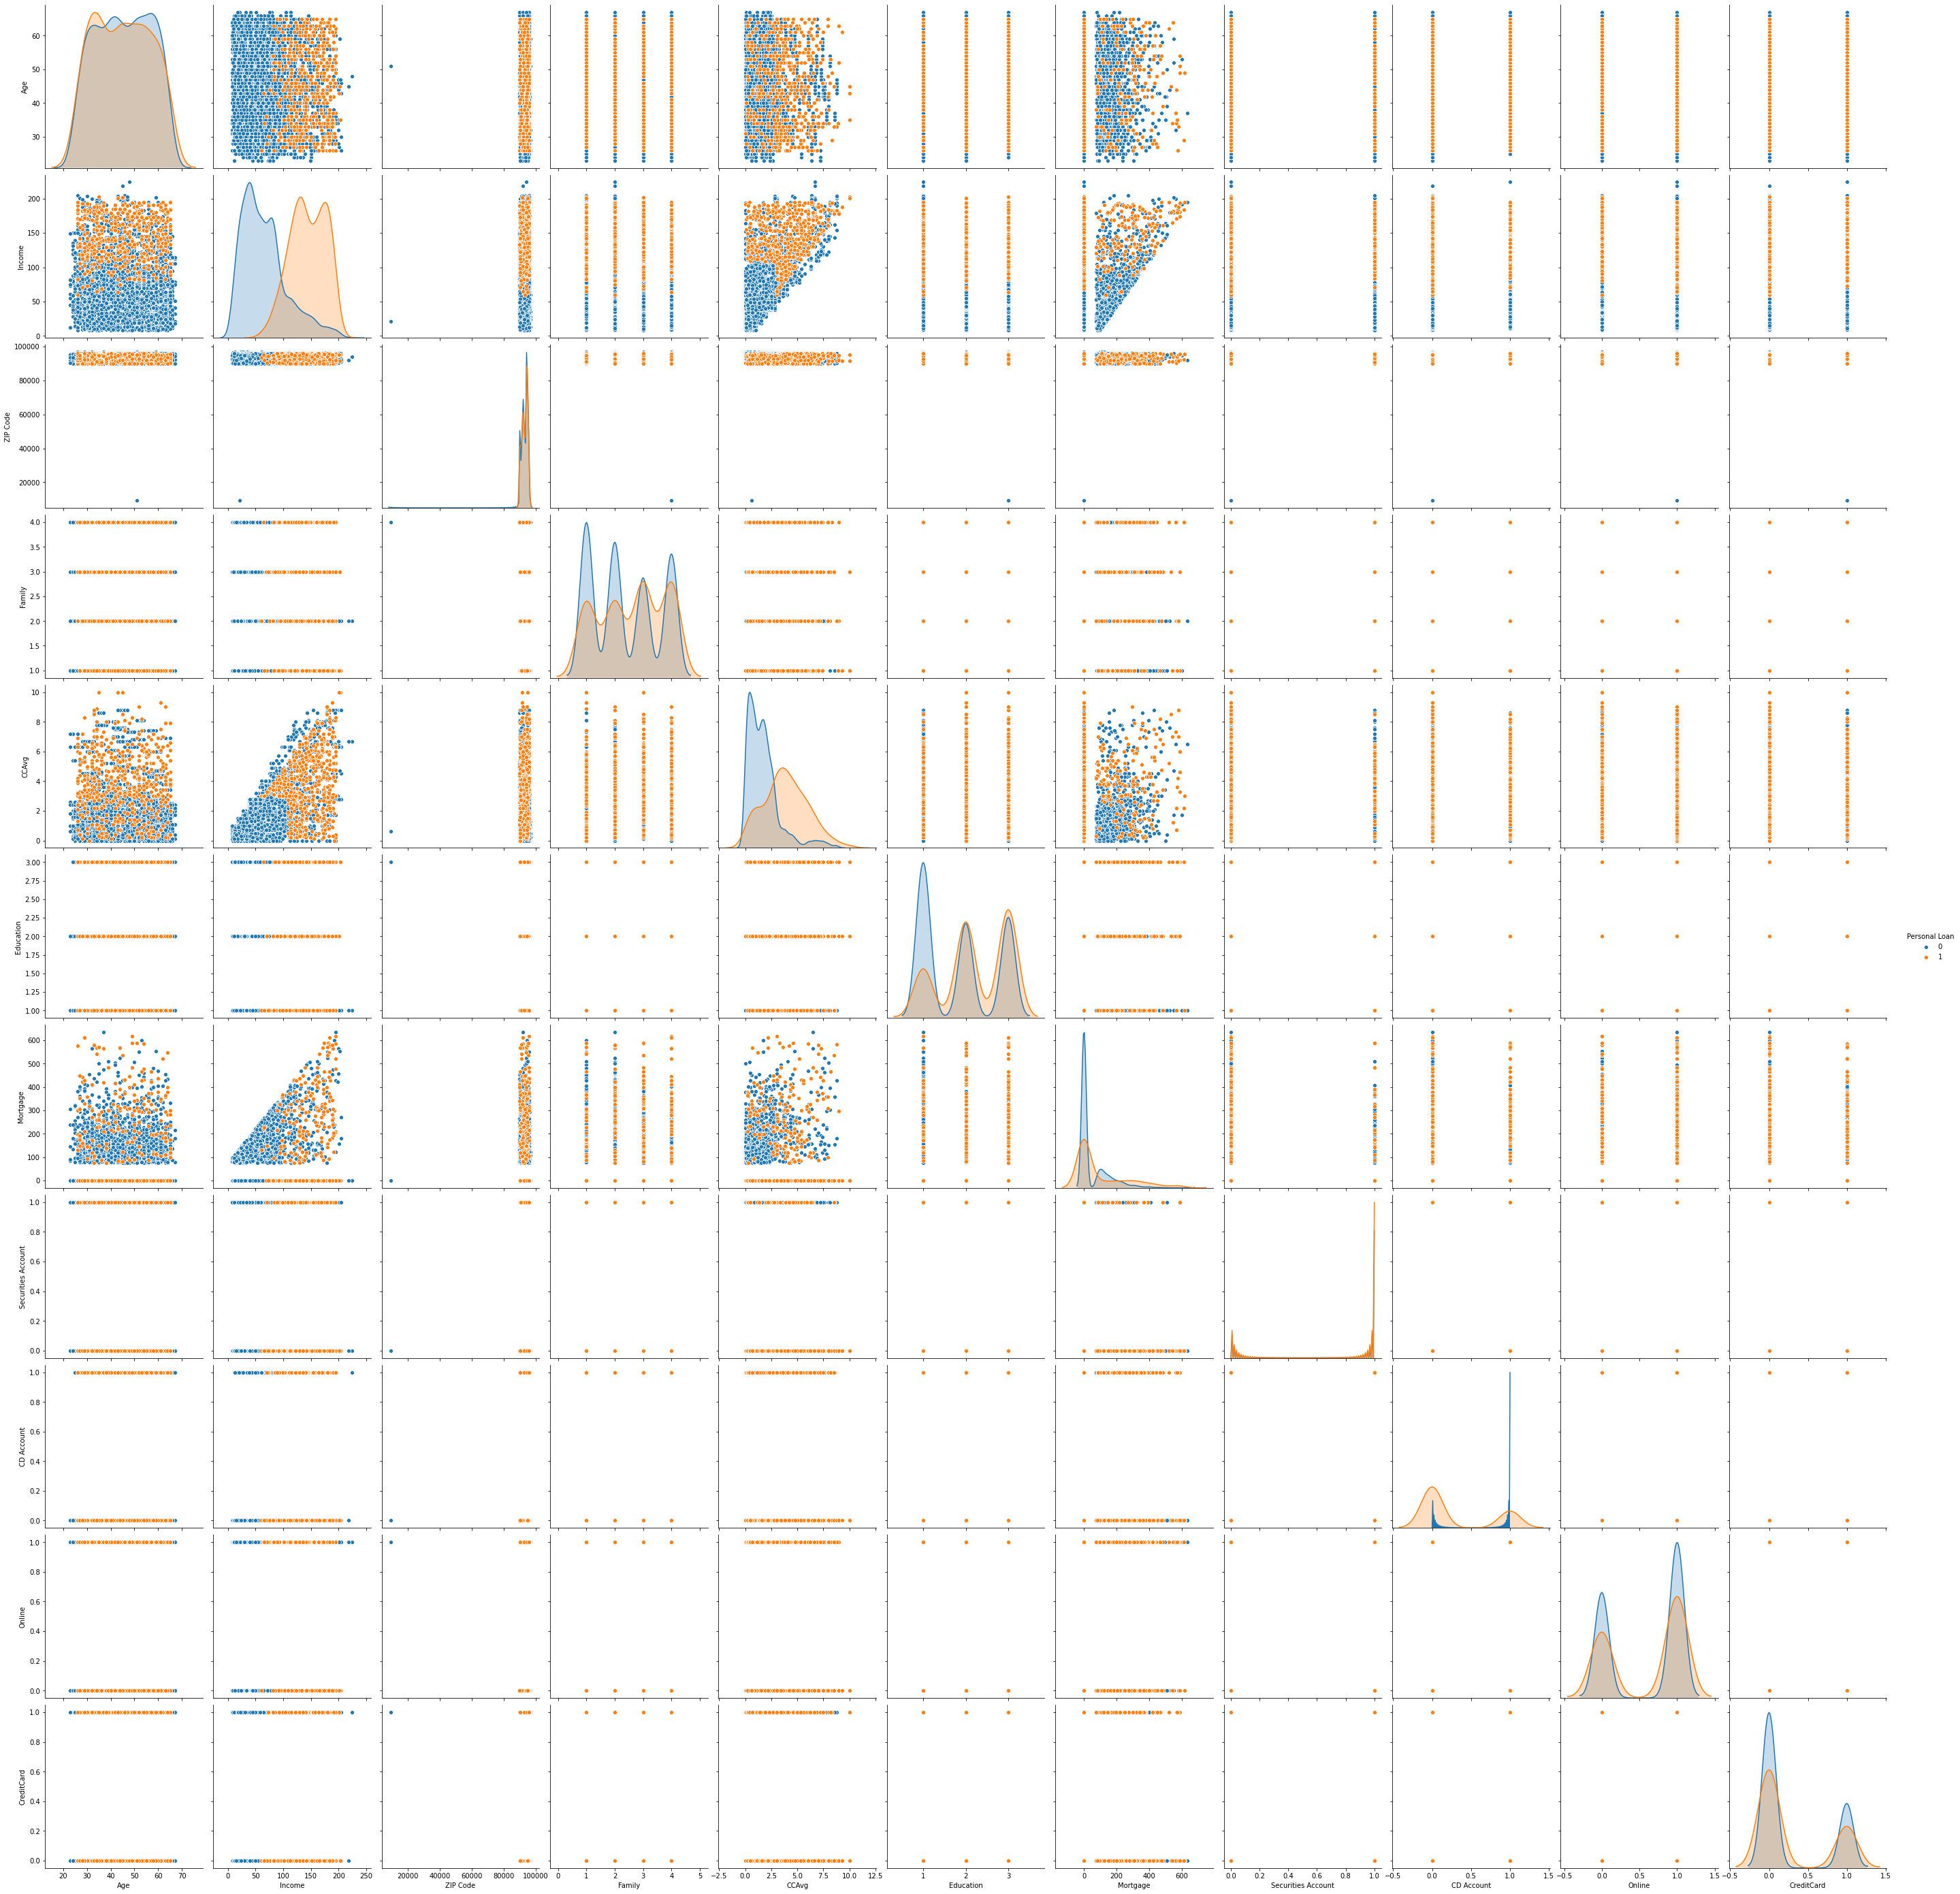

In [86]:
## Pairplot
sns.pairplot(data,hue='Personal Loan',height=3.5)

**x is our data and y is our target variable that is people taking loans**

In [87]:
data_X=data.loc[:,data.columns != "Personal Loan"]
data_Y=data[['Personal Loan']]

## **Step 4:Apply necessary transformations for the feature variables**

**Earlier the graphs of Income and CCAvg has shown right skewed distrubtion.In order to work with our data we should have normal distribution where mean=median=mode,so in order to convert into normal distribution we'll use power transformer**

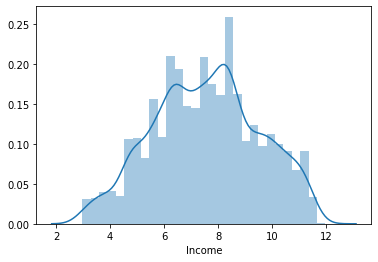

In [88]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data["Income"].values.reshape(-1,1))
data["Income"]=pt.transform(data["Income"].values.reshape(-1,1))
sns.distplot(data['Income'])



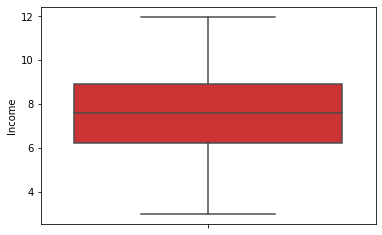

In [89]:
sns.boxplot(data["Income"],orient="v",palette="Set1")

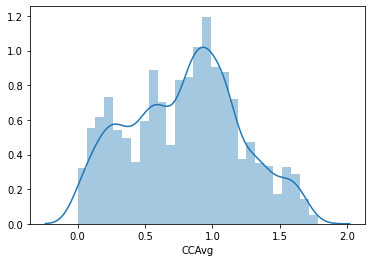

In [90]:
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data["CCAvg"].values.reshape(-1,1))
data["CCAvg"]=pt.transform(data["CCAvg"].values.reshape(-1,1))
sns.distplot(data["CCAvg"])



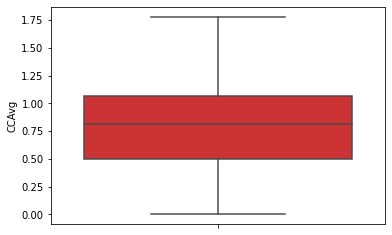

In [91]:
sns.boxplot(data["CCAvg"],orient="v",palette="Set1")

**Since both income and ccavg are nominal we dont have to use label encoding here**

### **Normalising the data using min-max scaler and standardisation scaler techniques**

In [92]:
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()
scalling.fit_transform(data[['Income','CCAvg']])

array([[0.42816231, 0.47486916],
       [0.32258527, 0.45762985],
       [0.05907692, 0.35609967],
       ...,
       [0.23165157, 0.14245545],
       [0.42816231, 0.21611989],
       [0.60049326, 0.30605536]])

In [93]:
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()
scalling.fit_transform(data[['Mortgage']])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [94]:
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
scalling.fit_transform(data[['Mortgage']])

array([[-0.55552393],
       [-0.55552393],
       [-0.55552393],
       ...,
       [-0.55552393],
       [-0.55552393],
       [-0.55552393]])

In [95]:
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
scalling.fit_transform(data[['Income']])

array([[-0.37393933],
       [-0.85862431],
       [-2.0683431 ],
       ...,
       [-1.27608433],
       [-0.37393933],
       [ 0.41720064]])

In [96]:
from sklearn.preprocessing import StandardScaler
scalling=StandardScaler()
scalling.fit_transform(data[['CCAvg']])

array([[ 0.11937968],
       [ 0.04513607],
       [-0.39211851],
       ...,
       [-1.31220861],
       [-0.99496191],
       [-0.60764164]])

**As for the case of Mortgage here it is in ordinal format so we have to apply here label encoding**

In [158]:
data['Mortgage']=pd.cut(data['Mortgage'],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True
                              )




In [98]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,6.827583,91107,4,0.845160,1,0,0,1,0,0,0
1,45,5.876952,90089,3,0.814478,1,0,0,1,0,0,0
2,39,3.504287,94720,1,0.633777,1,0,0,0,0,0,0
3,35,8.983393,94112,1,1.107427,2,0,0,0,0,0,0
4,35,6.597314,91330,4,0.633777,2,0,0,0,0,0,1


In [99]:
q1=data['Mortgage'].quantile(0.25)
q3=data['Mortgage'].quantile(0.75)
data['Mortgage']=np.where(data['Mortgage']<q1,q1,data['Mortgage'])
data['Mortgage']=np.where(data['Mortgage']<q3,q3,data['Mortgage'])
print(data['Mortgage'].skew())

4.289653125118686


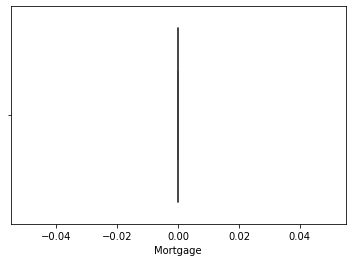

In [159]:
sns.boxplot(data['Mortgage'])
plt.show()

##**Step5: Now this step is to split the model in ratio of 70:30 using stratified sampling which is used to split train model and test model**

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_X,data_Y, test_size=0.3,stratify=data_Y,random_state=0)

X-train-to train the model

Y_train to train the model to predict

x_test-to Test the data

y_test-To test the predicted value of the data which is required.

We have splitted training dataset int 70% and testing data set into 30 %

In [102]:
data.shape

(5000, 12)

## **Step 6: To  predict the likelihood of a customer buying personal loans we are using linear regression**

In [103]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logmodel=LogisticRegression()

logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **In order to predict the accuracy we used ACCURACY_SCORE METHOD**
Accuracy=Tp+Tn/TP+Fp+Tn+Fn

Accuracy will only be good ifdata is balanced dataset

# **ACCURACY FOR TRAINING MODEL:90.62

In [104]:
logmodel.score(x_train,y_train)*100

90.62857142857142

# **ACCURACY FOR TESTING MODEL:90.93**

In [105]:
logmodel.score(x_test,y_test)*100

90.93333333333334

In [106]:
y_predict=logmodel.predict(x_test)
y_predict

array([1, 0, 0, ..., 0, 0, 0])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9093333333333333

## **For imbalanced dataset we'll go for recall precision and F-beta**
**REcall=Tp/Tp+Fn.It saya that out of ALL positive values how many values did we actually predicted positively**

In [108]:
from sklearn.metrics import recall_score
r=recall_score(y_test, y_predict)
print('recall is:',r)


recall is: 0.3263888888888889


In [109]:
from sklearn.metrics import precision_recall_curve
precision,recall,tresholds=precision_recall_curve(y_test,y_predict)
precision

array([0.096     , 0.54651163, 1.        ])

## **Precision=Tp/Tp+Fp.It says out of total predicted positive result how many results were actual positive**

In [110]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)
print('precision is:',precision)


precision is: 0.5465116279069767


### **Metrics using classification report**

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.55      0.33      0.41       144

    accuracy                           0.91      1500
   macro avg       0.74      0.65      0.68      1500
weighted avg       0.89      0.91      0.90      1500





1.   **Precision:0.55**
2.   **REcall score:0.33**
1.   **F-1 score:0.41**






## **Metrics using confusion matrix**

## **Confusion matrix:**It is a 2x2 matrix, in case of binary classification problem,the top vales are actual values and left side values are predicted values
First place:TRue positive
Second place:False positive-Type 1 error which can be found by FPR
Third place:False negative-Type 2 error which can be found by FNR
Fourth place:TRue negative

In [112]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
c

array([[1317,   39],
       [  97,   47]])

###**From here 1317+47=accuracy score**

###**And 39+97 values are not predicted correct**

confusion matrix


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

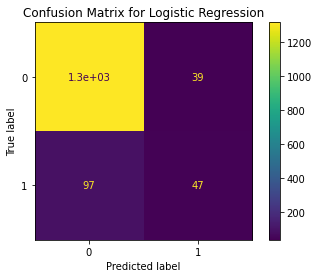

In [113]:
print('confusion matrix')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel, x_test, y_test)
plt.title('Confusion Matrix for Logistic Regression')


### **For constructing RoC curve we'll consider treshold values.An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.**

'print("Roc AUc Score:",roc_auc_score(y_test,x_test))'

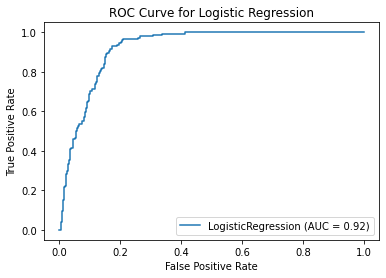

In [114]:
from sklearn.metrics import  plot_roc_curve
from sklearn.metrics import roc_auc_score
plot_roc_curve(logmodel, x_test, y_test)
plt.title('ROC Curve for Logistic Regression')
'''print("Roc AUc Score:",roc_auc_score(y_test,x_test))'''

### **1)MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation**
### **2)Root Mean Square Error is the measure of how well a regression line fits the data points**

In [115]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.09066666666666667
Root Mean Squared Error 0.3011090610836324
R2 Score -0.044739429695181965


In [116]:
print(metrics.recall_score(y_test,y_predict))

0.3263888888888889


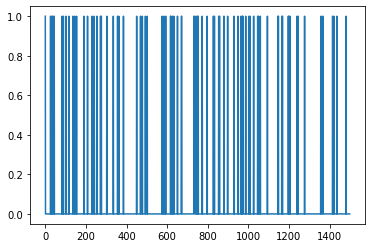

In [117]:
plt.plot(y_predict)

In [118]:
## Decision Tree Algorithm
## one of the classification and comes under supervised learning
## In decision tree, we are using CART(Classification and Regression Tree) algorithm
## We can quantify the uncertainity at a node using a metric Gene Impurity
## We use a metric Information gain to know how much uncertainity the question is reducing

In [119]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.734390e-16,1.513445e-15,7.850609e-16,-3.491429e-16,-6.315837e-16,-4.466205e-16,-5.565326e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.339554e+00,-3.951919e+01,-1.216855e+00,-1.925714e+00,-1.049078e+00,-2.878503e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-6.824605e-01,-5.851619e-01,-1.216855e+00,-7.270803e-01,-1.049078e+00,-2.878503e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,1.269388e-02,1.340930e-01,-3.454321e-01,4.513607e-02,1.417029e-01,-2.878503e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,6.910637e-01,6.860245e-01,5.259909e-01,6.579070e-01,1.332484e+00,-2.878503e-01,-3.258753e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,2.251263e+00,1.648959e+00,1.397414e+00,2.380933e+00,1.332484e+00,8.696242e+00,3.068659e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [120]:
from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

**In thi step we have accumulated all the necessary libraries which are used for doing decision tree,random classifier,k-nearest neighbour and random classifier and metrics to calculate the accuracy,precision and recall score.**

# **DECISION TREE CLASSIFIER**

In [121]:
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [122]:
#prediction function
y_pdt=dt_model.predict(x_test)
print(y_pdt)

[1 0 0 ... 0 0 0]


**Entropy-It is the metric measurement of the impurity of the problem and the first step in decision tree**

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9093333333333333

In [124]:
dt_model.score(x_train,y_train)

0.976

## **Accuracy using Decision Tree:0.976**

---



In [125]:
y_predict = dt_model.predict(x_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [126]:
x_test.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
9,34,180,93023,1,8.9,3,0,0,0,0,0
461,55,81,92123,2,3.7,1,0,1,0,0,0
3700,48,128,94608,1,5.7,1,0,1,0,0,0
1559,59,102,92677,4,3.0,2,115,0,0,1,0
4558,44,82,95521,2,0.4,1,0,0,0,1,1


### **Confusion matrix for Decision Tree**

In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[1345   11]
 [  24  120]]


###**1345+120=Accuracy score which predited correct**

###**11+24=Not predicted correct**

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1356
           1       0.92      0.83      0.87       144

    accuracy                           0.98      1500
   macro avg       0.95      0.91      0.93      1500
weighted avg       0.98      0.98      0.98      1500



### **Recall score:0.83**

###**Precision:0.92**

###**F-1score:0.87**

In [129]:
'''from sklearn.metrics import recall_score
r=recall_score(y_test, y_predict)
print('recall is:',r)'''


"from sklearn.metrics import recall_score\nr=recall_score(y_test, y_predict)\nprint('recall is:',r)"

In [130]:
'''from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)
print('precision is:',precision)'''


"from sklearn.metrics import precision_score\nprecision = precision_score(y_test,y_predict)\nprint('precision is:',precision)"

# **Naive Bayes**
It is a classificaation technique based on Bayes theorem with an assumtion of independence among precdictors.
It comprises of two parts Naive and Bayes.
In GaussianNB function it contains all the information which calcultes the mean,

standard deviation of the features ,

class instances calculation,

making predictions and 

estimating accuracy

we just need to fit according to our dataset

In [131]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

prediction = naive_model.predict(x_test)
naive_model.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8933333333333333

In [132]:
naive_model.score(x_train,y_train)

0.8851428571428571

### **Classification report for Naive Bayes**

In [133]:
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.61      0.52       144

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.90      1500




1.   **Precision:0.46**
2.   **REcall score:0.61**
1.   **F-1 score:0.52**


**

### **Confusion Matrix for Naive Bayes**

In [134]:
print(metrics.confusion_matrix(y_test,prediction))

[[1252  104]
 [  56   88]]


### **1252+88=Accuracy score which predicted correct**

###**104+56=Not predicted correct**

## **Accuracy using Naive Bayes:0.8984**

In [135]:
'''from sklearn.metrics import recall_score
r=recall_score(y_test, y_predict)
print('recall is:',r)'''


"from sklearn.metrics import recall_score\nr=recall_score(y_test, y_predict)\nprint('recall is:',r)"

In [136]:
'''from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)
print('precision is:',precision)'''


"from sklearn.metrics import precision_score\nprecision = precision_score(y_test,y_predict)\nprint('precision is:',precision)"

# **Random Forest classifier**

1.   Most used and it is a combination of classification and Regression problems

1.   It is made out of Decision trees.

1.   Has multiple layers to do both classification and regression problems.

2. Random Forest uses **ensemble learning method** which predicitons are based on combined results of individual models and make one model out of that.


 **bagging**-It is a method in which each model trains parallely with help of random subsets of data





### **Boosting-Training individual models in a sequential manner and it learns from previous model mistakes,a form of upgrading**

In [137]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

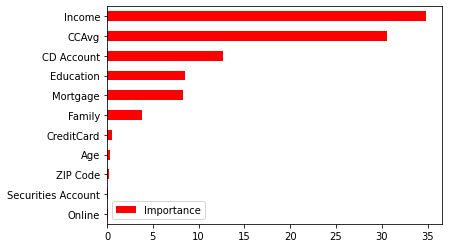

In [138]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [139]:
'''randomforest_model.score(x_test,y_test)'''

'randomforest_model.score(x_test,y_test)'

In [140]:
'''randomforest_model.score(x_train,y_train)'''

'randomforest_model.score(x_train,y_train)'

## **Accuracy using Random Forest classifier for training mode:0.918**

In [141]:
rpredict=randomforest_model.predict(x_test)
accuracy_score(rpredict,y_test)

0.918

###**Confusion matrix for Random Forest classifier**

In [142]:
print(confusion_matrix(rpredict,y_test))

[[1356  123]
 [   0   21]]


###**1356+21=accuracy score predicted correct**

###**123 values are not predicted correct**

### **Classification  report for random forest classifier**

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.15      0.25       144

    accuracy                           0.92      1500
   macro avg       0.96      0.57      0.61      1500
weighted avg       0.92      0.92      0.89      1500




1.   **Precision:1.00**
2.   **REcall score:0.15**
1.   **F-1 score:0.25**


In [144]:
'''from sklearn.metrics import recall_score
r=recall_score(y_test, y_predict)
print('recall is:',r)'''


"from sklearn.metrics import recall_score\nr=recall_score(y_test, y_predict)\nprint('recall is:',r)"

In [145]:
'''from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)
print('precision is:',precision)'''


"from sklearn.metrics import precision_score\nprecision = precision_score(y_test,y_predict)\nprint('precision is:',precision)"

### **KNN Algorithm**

STANDS for **K-Nearest Neighbur algorithm**

1.   It is a supervised machine learnh algorithm.
2.   Where we try to classifies new data point based on **nearest k points.**

1.  There is no training in this algorithm-**Lazy algorithm**
2.  Features similarity used by KNN algorithm.

1.  It calculates the **ecludeian** distances between all the data points and considers the data which is nearest to it for segregation.
2.  It all depends upon **k-value**.That means if k=5,it checks for 5 nearest data points for which newly entered data should be in.








In [146]:
knn = KNeighborsClassifier(n_neighbors=17 , weights = 'uniform', metric='euclidean')
knn.fit(x_train, y_train)    
predicted = knn.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
acc = accuracy_score(y_test, predicted)
print(acc)

0.904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## **Accuracy using K-Nearest Neighbour Algorithm:0.9096**

###**Confusion atrix for KNN algorithm**

In [147]:
print(confusion_matrix(y_test,predicted))

[[1345   11]
 [ 133   11]]


###**1345+11=Accuracy acore predicted correct**
###**133+11=Wrong prediction values**

### **Classification report for KNN algorithm**

In [148]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1356
           1       0.50      0.08      0.13       144

    accuracy                           0.90      1500
   macro avg       0.71      0.53      0.54      1500
weighted avg       0.87      0.90      0.87      1500




1.   **Precision:0.50**
2.   **REcall score:0.08**
1.   **F-1 score:0.13**


In [149]:
'''from sklearn.metrics import recall_score
r=recall_score(y_test, y_predict)
print('recall is:',r)'''


"from sklearn.metrics import recall_score\nr=recall_score(y_test, y_predict)\nprint('recall is:',r)"

In [150]:
'''from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)
print('precision is:',precision)'''


"from sklearn.metrics import precision_score\nprecision = precision_score(y_test,y_predict)\nprint('precision is:',precision)"

In [151]:
# defining the kmeans function with initialization as k-means++
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
# inertia on the fitted data
kmeans.inertia_

10311155646.104055

Text(0, 0.5, 'Error rate')

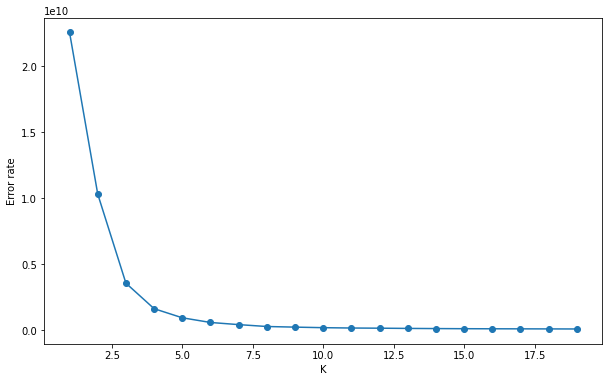

In [153]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(10,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('K')
plt.ylabel('Error rate')


1.   To find out best k value, we have taken a function which checks for good results and accuracy depends upon the  different k-values from 1 to 20 range.
2.   We have less errors at 17.5 from the graph.So k=17

## **Comparision of models**

In [154]:


X=data.drop(['Personal Loan'],axis=1)
y=data.pop('Personal Loan')
 


Now we need to set up our models that we’ll be testing out. We’ll set up a list of the models and give them each a name. Additionally, I’m going to set up the blank arrays/lists for the outcomes and the names of the models to use for comparison.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.904800 (0.011531)
CART: 0.982000 (0.004195)
NB: 0.907200 (0.010088)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.987000 (0.004313)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.904000 (0.012522)


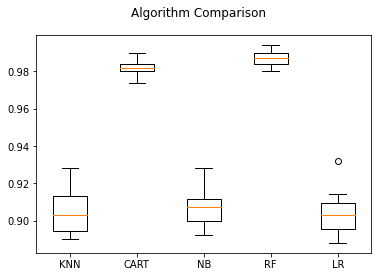

In [155]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR',LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **K Fold cross validation process**

1.   That k-fold cross validation is a procedure used to estimate the skill of the model on new data.
2.   The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

1.   When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.
2.   to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

1.  k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
2. Hence we used k fold validation here to compare the models.








We are going to use a k-fold validation to evaluate each algorithm and will run through each model with a for loop, running the analysis and then storing the outcomes into the lists we created above. We’ll use a 10-fold cross validation.

#**Business Report:**

# **Machine Learning**:Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.

## **Types:**

*   **Supervised learning algorithms** try to model relationships and dependencies between the target prediction output and the input features such that we can predict the output values for new data based on those relationships which it learned from the previous data sets.**EX:Weather prediction,creditcard prediction.**
*  **Unsupervised learning algorithms** There are no output categories or labels here based on which the algorithm can try to model relationships. These algorithms try to use techniques on the input data to mine for rules, detect patterns, and summarize and group the data points which help in deriving meaningful insights and describe the data better to the users.**Ex:Image recognition,bigdata visualisation.**

*   **Reinforcement learning algorithm**It allows machines and software agents to automatically determine the ideal behavior within a specific context, in order to maximize its performance.**EX:Q-learning,R-learning**


1.   Classification and regression prblems comes under supervised machine learning algorithms.

2.   Here we have performed our predictions and analysis based on classification problems.



###**Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.**




1.  **Step1:**In order to work with our data set we need to **collect** it and store in one variable.


*  We need to check with the datatypes because when there are categorical data we need to convert into numerical values.(gender,institution name).
*   Also we checked for null values which are of no use.









  *   We need to check our dataset information with **info**,**describe** funtions.
  *   Now we have checked for dimensions that is number of rows and columns present in dataset,using **shape** function.


2.    ### **Step2:Redundancy values**
  

*  From the data Id numbers are not important because it doesn't affect the performance and result.

*   Checked for correlation in which if one increases then other also increases.
*   From the above correlation values **Age** and **Experience** are highly correlated to each other.


*  So we dropped both **Id** and Experience columns.


3. ## **step 3**: **EDA stands for Exploratory data analysis**.

*  Steps involved in these are to understand the data,clean the data and analysis on relationship between variables.

*  We checked for unique values in each columns,value counts,number of people with zero mortgage and people who are not using creditcards.

*  **Univaraiate analysis:**

*   It hepl us to easily understand the data,analyse the data and leads us to go in a right path,we'll take only one of the features which leads the person to take personal loan.
*  **Bivariate Analysis:**In this we'll tae atleast two values to see how output will be and here we checked for **Education:Income,education:Mortgage,CCAccount,Family,how hese features impacts on Personal loan using boxplots.


* **Multivariate Analysis**:In this each and every feature will be compared to others.We'll use **pairplot** function here.

*   As a process of cleaning the data we need to check for outliers which affects the performance and result of the model.
So I used histogram graph to find out outliers and to check for skewed data and normal distribution too
*  As a part of checking redundancy values we need to check for outliers and I checked with histograms,catplot and boxplot methods.

*  REmoved Zipcode as it is a categorical data which is in nominal format   which doesn't affect the performance of the dataset and resuts too.
*  Hence we removed **zipcode**.

4.  ## **Step4:Apply Transformations**


*   **X-is independent variable** which contains all the coums except personal loan.And **Y-dependent variable**,which is out target variable.
*   Earlier the graphs of Income and CCAvg has shown right skewed distrubtion.In order to work with our data we should have normal distribution where mean=median=mode,so in order to convert into normal distribution we'll use power transformer

*   From graphs we have seen that Mortgage,CCAvg,Income are right skewed,for classififcation algorithms data should be normally distributed.
*   By using box plot method we checked for outliers after applyting **yeo-johnson method**

*   Then we did normalisation and standardisation methods which keeps the feature values in sam range which hepls t compare easily.Min-max sclaes down between **0 and 1**.Standardisattion scalling-**-1 and 1**
*   So we removed outliers with help of power transformation method for Income and CCavg.When it comes to Mortgage,as it is in ordinal format we convert applied label coding.






5.  ## **Step5: Now this step is to split the model in ratio of 70:30 using stratified sampling which is used to split train model and test model**





*   we split thismodel in the ratio of 70:30.
*   70% of data is for trainig set and 30% percent of observations are for testing set.

6.   ## **Step 6:Applying logistic regression**

*   Fitting the model to train the data.
* Using LogisticRegressio function.


7.   ## **Step 7:Metrics**

*   **confusion matrix**First place:TRue positive
Second place:False positive-Type 1 error which can be found by FPR
Third place:False negative-Type 2 error which can be found by FNR
Fourth place:TRue negative
*  **classification report**-which says about** precision,recall and f1** score and accuracy score is used for finding out accuracy value for testing models.

1. ##**Step 8:Decision tree,Random forest classifier,Naive Bayes,KNN algorithm**

*   **Decision Tree**:Based on conditions it takes decisions and proceeds.
    uses **CART algorithm**
*   **Random Forest**:Uses **ensemble** method,bagging,boosting techniques.

*   **Niave Bayes**:Complletely depends upon the **Bayes theorem**,conditional probability.
*   **KNN algorithm:**IT depends on **K value** to which new category of data should fall in.




9.   **##Sep 9:Which one is good?**

*   Based on consideration of all  the metrics from the above data I think **RANDOM CLASSIFIER is the best one**. 
*   It allows the liabiity of customer buying loans are more.



**WHY?**

*  When COmparing the models we used k-fold-validation

















































**k-Fold Cross-Validation:**

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

    1.Shuffle the dataset randomly.
    2.Split the dataset into k groups
    3.For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

* Based on mean,standard deviation,preciison,recall score and accuracy **Random classifier is the best**

* By usin this **k-fold-validation** also the graph showed that **Random forest classifier is the best which is above 0.98**.Hence k-fold validation played a key role and inference of a graph too.